In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | villa gesell
Processing Record 2 of Set 1 | senillosa
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | hihifo
City not found. Skipping...
Processing Record 6 of Set 1 | invercargill
Processing Record 7 of Set 1 | walvis bay
Processing Record 8 of Set 1 | muang phonsavan
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | mpulungu
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | atafu village
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | opuwo
Processing Record 17 of Set 1 | khanty-mansiysk
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | sandnessjoen
Processing Record 20 of Set 1 | sorong
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | wh

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,villa gesell,-37.2639,-56.9730,286.13,66,3,2.67,AR,1724791592
1,senillosa,-39.0000,-68.4167,288.03,29,70,5.14,AR,1724791660
2,adamstown,-25.0660,-130.1015,292.60,71,99,7.83,PN,1724791661
3,ushuaia,-54.8000,-68.3000,279.96,61,20,5.14,AR,1724791663
4,invercargill,-46.4000,168.3500,280.94,98,53,0.89,NZ,1724791665


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("my_output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("my_output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,villa gesell,-37.2639,-56.9730,286.13,66,3,2.67,AR,1724791592
1,senillosa,-39.0000,-68.4167,288.03,29,70,5.14,AR,1724791660
2,adamstown,-25.0660,-130.1015,292.60,71,99,7.83,PN,1724791661
3,ushuaia,-54.8000,-68.3000,279.96,61,20,5.14,AR,1724791663
4,invercargill,-46.4000,168.3500,280.94,98,53,0.89,NZ,1724791665


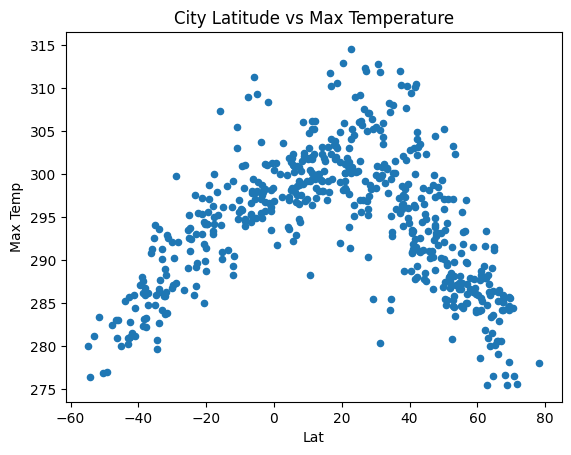

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = 'Lat', y = 'Max Temp')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("my_output_data/Fig1.png")

# Show plot
plt.title("City Latitude vs Max Temperature")
plt.show()

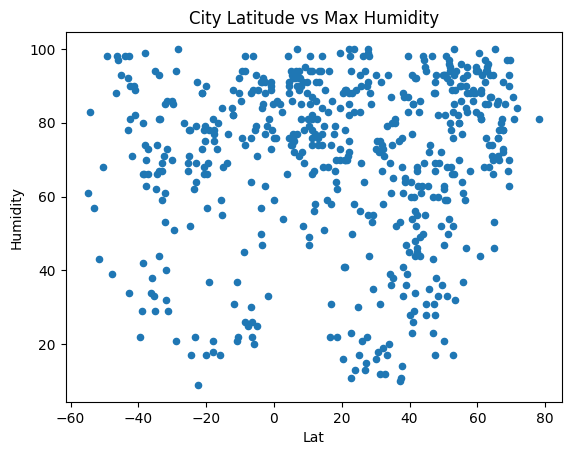

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = 'Lat', y = 'Humidity')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("my_output_data/Fig2.png")

# Show plot
plt.title("City Latitude vs Max Humidity")
plt.show()

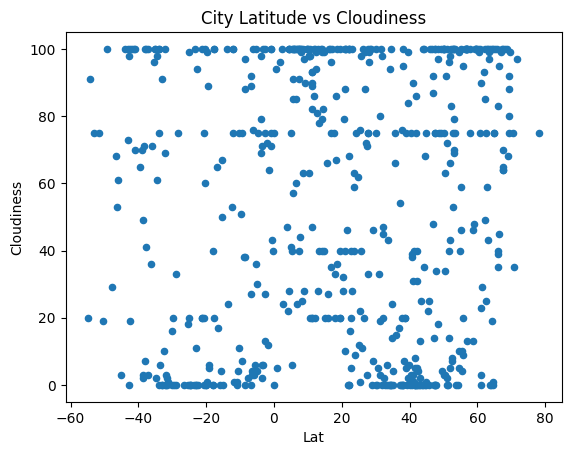

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x = 'Lat', y = 'Cloudiness')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("my_output_data/Fig3.png")

# Show plot
plt.title("City Latitude vs Cloudiness")
plt.show()

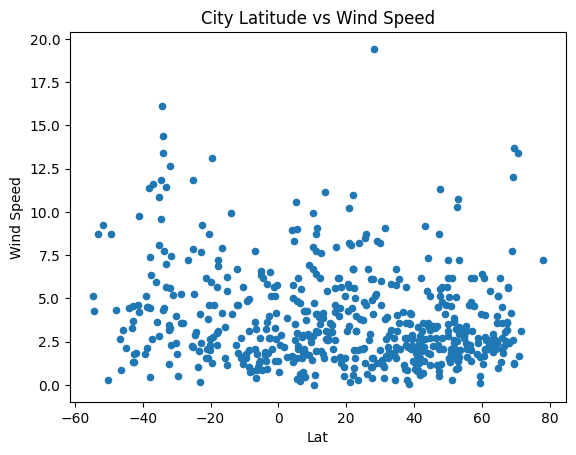

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = 'Lat', y = 'Wind Speed')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("my_output_data/Fig4.png")

# Show plot
plt.title("City Latitude vs Wind Speed")
plt.show()

In [13]:
# Define a function to create Linear Regression plots
def regress_line (x, y, x_name, y_name, title):
    dict = {x_name: x,
            y_name: y}
    df = pd.DataFrame(dict)
    correlation_coefficient, p_value = st.pearsonr(x, y)
    print("The r^2 value is " + str((correlation_coefficient * correlation_coefficient)))
    slope, intercept = np.polyfit(x, y, 1)
    df.plot.scatter(x = x_name, y = y_name)
    plt.title(title)
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    x_position = x_min + 0.1 * (x_max - x_min)
    y_position = y_max - 0.1 * (y_max - y_min)
    plt.text(x_position, y_position, f'y = {round(slope,2)}x + {round(intercept,2)}', color='red', fontsize=12)
    plt.plot(x, slope * x + intercept, color='red')

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,muang phonsavan,19.4500,103.2167,291.93,99,100,0.51,LA,1724791667
7,bilibino,68.0546,166.4372,276.61,85,100,2.45,RU,1724791668
12,san patricio,28.0170,-97.5169,307.12,44,96,6.10,US,1724791674
15,khanty-mansiysk,61.0042,69.0019,288.21,88,0,2.00,RU,1724791677
16,tiksi,71.6872,128.8694,275.57,84,97,3.11,RU,1724791678


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,villa gesell,-37.2639,-56.9730,286.13,66,3,2.67,AR,1724791592
1,senillosa,-39.0000,-68.4167,288.03,29,70,5.14,AR,1724791660
2,adamstown,-25.0660,-130.1015,292.60,71,99,7.83,PN,1724791661
3,ushuaia,-54.8000,-68.3000,279.96,61,20,5.14,AR,1724791663
4,invercargill,-46.4000,168.3500,280.94,98,53,0.89,NZ,1724791665


The r^2 value is 0.47347332746931514


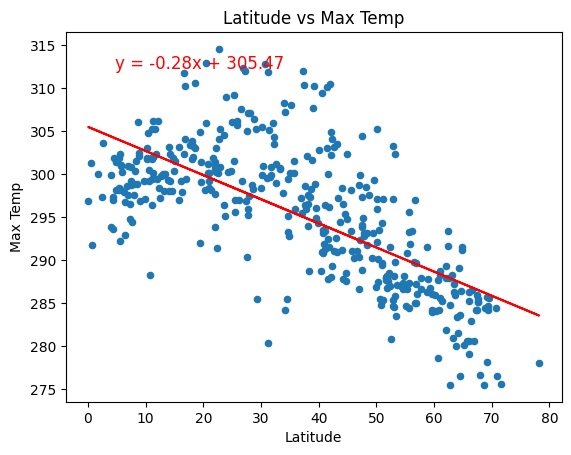

In [16]:
# Linear regression on Northern Hemisphere
regress_line(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', title="Latitude vs Max Temp")

The r^2 value is 0.6971362756372519


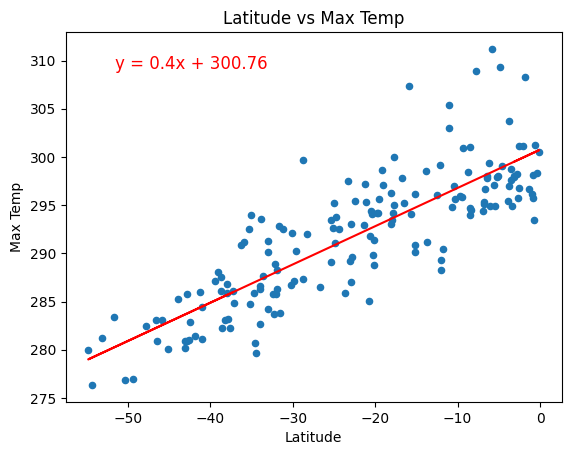

In [17]:
# Linear regression on Southern Hemisphere
regress_line(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', title = "Latitude vs Max Temp")

The r^2 value is 0.00014561229326081468


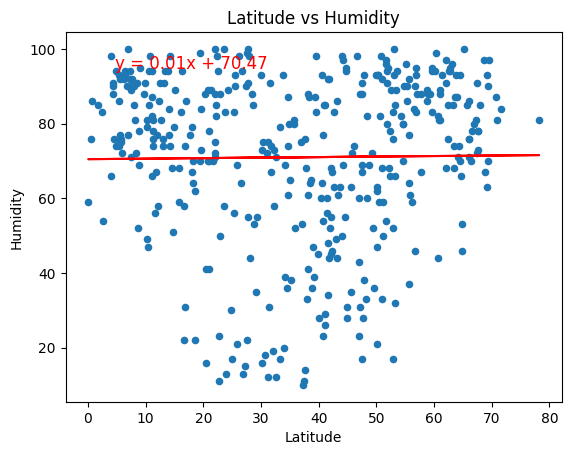

In [18]:
# Northern Hemisphere
regress_line(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', title = "Latitude vs Humidity")

The r^2 value is 7.309943357201435e-07


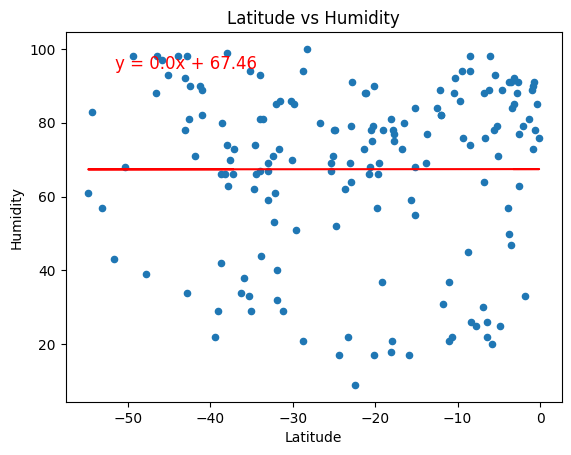

In [19]:
# Southern Hemisphere
regress_line(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', title = "Latitude vs Humidity")

The r^2 value is 0.0022558216674367308


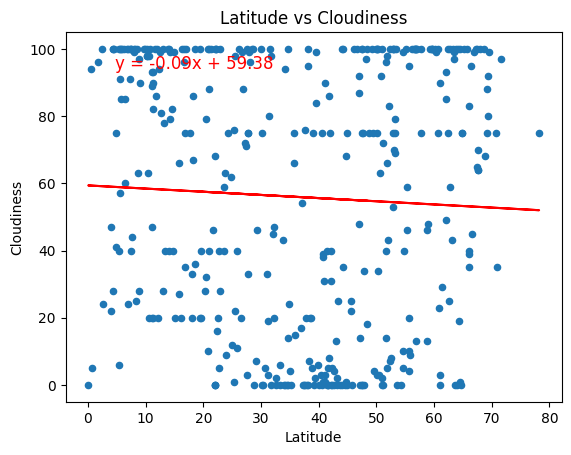

In [20]:
# Northern Hemisphere
regress_line(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', title = "Latitude vs Cloudiness")

The r^2 value is 0.0032909940517336384


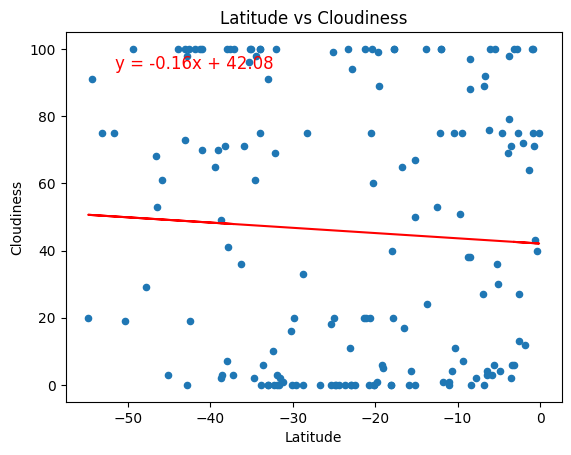

In [21]:
# Southern Hemisphere
regress_line(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', title = "Latitude vs Cloudiness")

The r^2 value is 0.004394962414310922


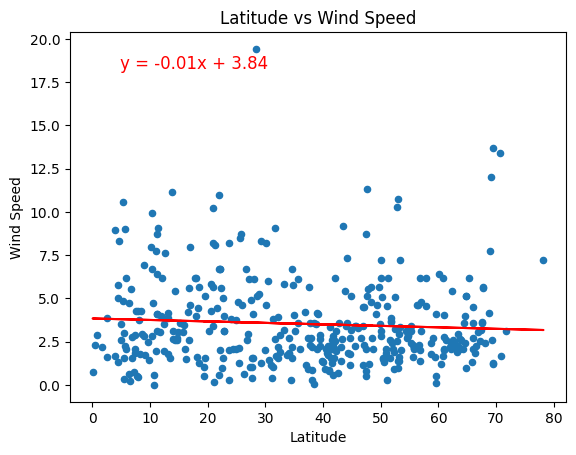

In [22]:
# Northern Hemisphere
regress_line(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', title = "Latitude vs Wind Speed")

The r^2 value is 0.06553160968869443


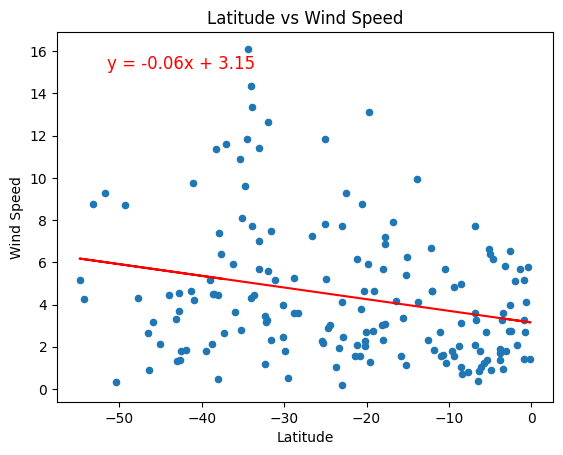

In [23]:
# Southern Hemisphere
regress_line(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', title = "Latitude vs Wind Speed")